<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%201%20DL%201/IrisLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Learning Rate Exercise
Exercise to adjust the learning rate of the optimiser

Load the libraries and prepare the data

In [ ]:
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras import utils
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# get the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalise the data
df_norm = normalize(df)

# 2. split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df_norm, data.target, random_state=0)

# one-hot encode the data
Y_train_cat = utils.to_categorical(Y_train)
Y_test_cat = utils.to_categorical(Y_test)


Create, compile, fit the model and plot the accuracy and loss


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/125
12/12 [==============================] - 1s 43ms/step - loss: 1.1031 - accuracy: 0.3337 - val_loss: 1.1290 - val_accuracy: 0.4474
Epoch 2/125
12/12 [==============================] - 0s 4ms/step - loss: 1.0651 - accuracy: 0.7040 - val_loss: 1.1092 - val_accuracy: 0.5789
Epoch 3/125
12/12 [==============================] - 0s 4ms/step - loss: 1.0688 - accuracy: 0.6879 - val_

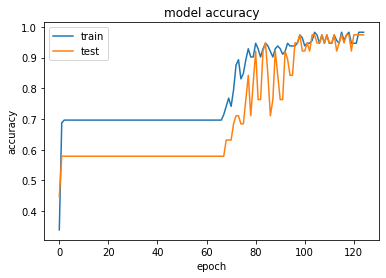

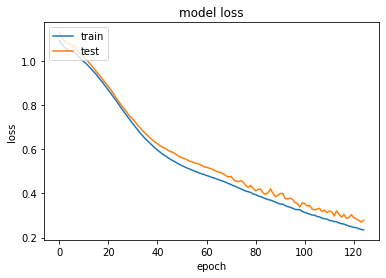

In [ ]:
model = Sequential() 
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Adjust the learning rate of the optimiser
Instead of specifying the optimiser as a string, you can specify the optimiser as an object.  Specifying the optimiser as a string means that it uses it's default parameters.  By specifying it as an object, you have more flexibility and can change it's parameters.  Implement the optimiser as an object so you can change the learning rate (hint: see [keras optimisers](https://keras.io/api/optimizers)).  As we are using Keras from within tensorflow, you will also need to import tensorflow and reference keras from that.  Then you will be able to access the `optimizers` module as in the Keras documentation.



```
import tensorflow as tf
tf.keras.optimizers...
```



Set the learning rate to the following values.  You will need to re-create, re-compile and re-fit the model and re-plot the accuracy and loss to try out each learning rate.


*   0.0001
*   0.001
*   0.01
*   1




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/125
12/12 [==============================] - 1s 31ms/step - loss: 1.8231 - accuracy: 0.2453 - val_loss: 1.0757 - val_accuracy: 0.4211
Epoch 2/125
12/12 [==============================] - 0s 5ms/step - loss: 1.1949 - accuracy: 0.3373 - val_loss: 1.2525 - val_accuracy: 0.3421
Epoch 3/125
12/12 [==============================] - 0s 4ms/step - loss: 1.2636 - accuracy: 0.3383 - va

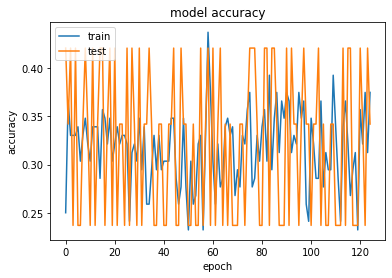

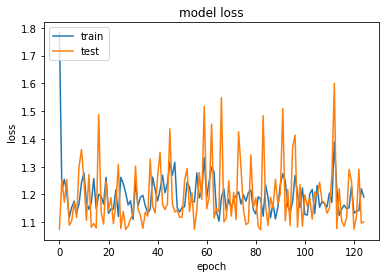

In [ ]:
model = Sequential() 
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=1)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()